<a href="https://colab.research.google.com/github/dgromann/cl_intro_ws2025/blob/main/tutorials/Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 4: Introduction to Computational Linguistics

This is the fourth tutorial with practical exercises for the lecture Introduction to Computational Linguistics in the winter semester 2025. Hands-on exercises are marked with 👋 ⚒ and questions are marked with ❓. Remember to first **store this notebook** in your Drive or GitHub.

## **Lesson 1: Hugging Face Tutorial**

Hugging Face is a platform that provides access to models, datasets, and metrics. It mostly provides implementations in PyTorch and TensorFlow.


In this tutorial, we will first focus on tokenizers and models. Afterwards, we will look into fine-tuning models. For further reading and to help your project, please check the [Hugging Face Documentation and Tutorials](https://huggingface.co/docs/transformers/index).

As a first step, we need to install the libraries `transformers`to load any transformer models and the library `datasets`to have access to all the Hugging Face datasets.

In [1]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install bertviz transformers
!pip install accelerate --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.5 MB/s eta 0:00:00


When using Hugging Face, there are two very important objects to be initialized, a **tokenizer** and a **model**.



*   **Tokenizer**: converts strings or text to lists of vocabularies required by the model
*   **Model**: takes the tokenized datasets, i.e., the vocabulary ids, and can be trained to produce a prediction

We will start looking into the tokenizer first.

### Tokenizer

Pre-trained language models are implemented with a tokenizer that processes their input. You can either access teoknizers with the class specific to the model, i.e., DistilBERT, or use the `AutoTokenizer` class that defaults to the optimized tokenizer of the models. The alternative would be to use `DistilBertTokenizerFast` directly.

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-cased")
print(tokenizer)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


We will now input a sample sentence to the tokenizer to create a list of vocabularies with related ids and see how to access the ids the tokenizer provides.

The resulting datatype is called ` BatchEncoding`, which holds the output of a pretrained batch encoding method and is derived from a Python dictionary.

**❓** Why did the tokenizer generate more IDs than there are words in the input sentence?

In [5]:
input_str = "Hugging Face is great!"
tokenized_inputs = tokenizer(input_str)

# Two ways to access:
print(tokenized_inputs.input_ids)
print(tokenized_inputs["input_ids"])

[101, 20164, 10932, 10289, 1110, 1632, 106, 102]
[101, 20164, 10932, 10289, 1110, 1632, 106, 102]


Tokenization is a process of several steps. First the string is tokenized, which is slightly different from the tokenization of Tutorial 2, and then the tokens converted to IDs as shown below.

The tokens shown represent so-called wordpieces, which is the result of a subword tokenization algorithm underlying the AutoTokenizer algorithms. The algorithm is called WordPiece and was developed by Google when pretraining BERT. The characters `##` are a WordPiece prefix to indicate wordpieces inside a word. See the following tutorial for [more information on WordPiece](https://huggingface.co/learn/nlp-course/chapter6/6?fw=pt).

In [ ]:
input_tokens = tokenizer.tokenize(input_str)
print(f"Tokens of the input sequence: {input_tokens}")
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)
print(f"IDs assigned to the intput sequence: {input_ids}")

To convert existing IDs back to text, we can use the function `decode`.



In [ ]:
decoded = tokenizer.decode(input_ids)
print(decoded)

👋 ⚒ Decode the original tokenized sequence `tokenized_inputs` in the code cell below. First, find out and print which datatype this variable is. Remember that the `decode` function only takes IDs as input.

In [ ]:
# Decode the original variable tokenized_inputs
print(tokenized_inputs)

So the mystery of more IDs than visible words in the input sequence can partially be answered by the tokenization and by the fact that a special token [CLS] at the beginning of a sequence and [SEP] at the end of a sequence are added for BERT-type models.

Another way to reach a similar result as with `decode` can be seen in the next code cell. The difference is that with this method the special tokens are also represented.

In [ ]:
inputs = tokenizer._tokenizer.encode(input_str)
special = inputs.tokens
print(special)

Converting the output of the tokenizer to a PyTorch tensor can be done easily by adding `return_tensor = pt`to the tokenization process. Compare the following output with the output of the previous code cell.

In [ ]:
model_inputs = tokenizer("Hugging Face is great!", return_tensors="pt")
print(model_inputs)

We can also tokenize a number of sentences at once. To ease processing, it is common to make all sentences of the same length by padding, that is, adding the `PAD' token to sequences to turn them all into sequences of the same length.

In [ ]:
model_inputs = tokenizer(["Hugging Face is great!",
                         "The quick brown fox jumps over the lazy dog.",
                         "We are learning to fine-tune models.",
                         ],
                         return_tensors="pt",
                         padding=True,
                         truncation=True)
print(model_inputs)
print(tokenizer.pad_token, tokenizer.pad_token_id)

In order to decode a whole set of sentences, we can use the function batch decode.

In [ ]:
print(tokenizer.batch_decode(model_inputs.input_ids))
print()
print("Omitting special characters when decoding:")
print(tokenizer.batch_decode(model_inputs.input_ids, skip_special_tokens=True))

## Model

The way models are initialized in Hugging Face is achieved with a similar code as initializing Tokenizers. There are model-specific classes or the AutoModel classes, which is preferable when comparing different models.

Hugging Face automatically sets up the architecture you need for a specific task when you specify the model class, e.g. `AutoModelForSequenceClassification` respectively the model-specific `DistilBertForSequenceClassification` need to be used when you want to do sentiment analysis, question-answering, etc. For training a model on the masked language task, you need to use other classes, such as `DistilBertForMaskedLM`. More details can be found [here](https://huggingface.co/learn/nlp-course/chapter2/2?fw=pt).


The main three types of models are:


*   Encoders, e.g. BERT
*   Decoders, e.g. GPT-2
*   Encoder-Decoders, e.g. BART or T5, which are Machine Translation (MT) models



In [3]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('distilbert/distilbert-base-cased', num_labels=2)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We get this warning because the sequence classification parameters of the model have not yet been trained.

To input a string into a model requires it to be tokenized first. Then the input is very easy. The output consists of two classes since we indicated `num_labels = 2`.

In [6]:
import torch

model_inputs = tokenizer(input_str, return_tensors="pt")

model_outputs = model(**model_inputs)

print(model_inputs)
print(model_outputs)

print("To convert the logits outputs to probabilities, we can use softmax again:", torch.softmax(model_outputs.logits, dim=1))

{'input_ids': tensor([[  101, 20164, 10932, 10289,  1110,  1632,   106,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
SequenceClassifierOutput(loss=None, logits=tensor([[0.0888, 0.1084]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
To convert the logits outputs to probabilities, we can use softmax again: tensor([[0.4951, 0.5049]], grad_fn=<SoftmaxBackward0>)


Now we have two output classes for a binary classification task, which is only due to the fact how Hugging Face calculates the loss.

We can now use the model logits to calculate the loss, i.e., go from the model predictions to the intended label and calculate the difference with any suitable loss function. We will first do this using PyTorch.

For this example, we pretend that Label 1 is the correct label and pass this information to a loss function. Since this is a binary classification task, it makes more sense to use sigmoid or cross-entropy rather than softmax as a loss function.

In [7]:
label = torch.tensor([1])
loss = torch.nn.functional.cross_entropy(model_outputs.logits, label)
print(loss)
loss.backward()

# You can get the parameters
list(model.named_parameters())[0]

tensor(0.6834, grad_fn=<NllLossBackward0>)


('distilbert.embeddings.word_embeddings.weight',
 Parameter containing:
 tensor([[-2.5130e-02, -3.3044e-02, -2.4396e-03,  ..., -1.0848e-02,
          -4.6824e-02, -9.4855e-03],
         [-4.8244e-03, -2.1486e-02, -8.7145e-03,  ..., -2.6029e-02,
          -3.7862e-02, -2.4103e-02],
         [-1.6531e-02, -1.7862e-02,  1.0596e-03,  ..., -1.6371e-02,
          -3.5670e-02, -3.1419e-02],
         ...,
         [-9.6466e-03,  1.4814e-02, -2.9182e-02,  ..., -3.7873e-02,
          -4.6263e-02, -1.6803e-02],
         [-1.3170e-02,  6.5378e-05, -3.7222e-02,  ..., -4.3558e-02,
          -1.1252e-02, -2.2152e-02],
         [ 1.1905e-02, -2.3293e-02, -2.2506e-02,  ..., -2.7136e-02,
          -4.3556e-02,  1.0529e-04]], requires_grad=True))

We can also calculate the loss directly with Hugging Face.

In [8]:
model_inputs = tokenizer(input_str, return_tensors="pt")

labels = ['NEGATIVE', 'POSITIVE']
model_inputs['labels'] = torch.tensor([1])

model_outputs = model(**model_inputs)


print(model_outputs)
print()
print("Model predictions: ", labels[model_outputs.logits.argmax()])

SequenceClassifierOutput(loss=tensor(0.6834, grad_fn=<NllLossBackward0>), logits=tensor([[0.0888, 0.1084]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Model predictions:  POSITIVE


To analyze in more detail what happens during training, we can visualize the attention weights and hidden states.

We can use BertViz to explicitly see the change of the attention weights for each layer.

In [9]:
from bertviz import model_view, head_view

# We need to initialize the model with setting output attentions explicitly to True
model = AutoModelForSequenceClassification.from_pretrained('distilbert/distilbert-base-cased', num_labels=2, output_attentions=True)
# We then need to explicitly encode the tokens
inputs = tokenizer.encode(input_str, return_tensors='pt')
outputs = model(inputs)

attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])
head_view(attention, tokens)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<IPython.core.display.Javascript object>

There is also another method to analyze hidden states and attention weights.

In [10]:
from transformers import AutoModel

model = AutoModel.from_pretrained("distilbert/distilbert-base-cased", output_attentions=True, output_hidden_states=True)
model.eval()

model_inputs = tokenizer(input_str, return_tensors="pt")
with torch.no_grad():
    model_output = model(**model_inputs)


print("Hidden state size (per layer):  ", model_output.hidden_states[0].shape)
print("Attention head size (per layer):", model_output.attentions[0].shape)     # (layer, batch, query_word_idx, key_word_idxs)
                                                                               # y-axis is query, x-axis is key
print(model_output)

Hidden state size (per layer):   torch.Size([1, 8, 768])
Attention head size (per layer): torch.Size([1, 12, 8, 8])
BaseModelOutput(last_hidden_state=tensor([[[ 0.2659,  0.0836,  0.0341,  ...,  0.0730,  0.2022,  0.0410],
         [-0.0869, -0.0430,  0.0154,  ...,  0.2884, -0.1054,  0.0029],
         [-0.0639,  0.0385,  0.1319,  ...,  0.1864, -0.1142, -0.2982],
         ...,
         [ 0.1634,  0.0152,  0.0670,  ...,  0.4294, -0.1019,  0.1220],
         [ 0.3047,  0.2164,  0.3302,  ...,  0.4458,  0.1230,  0.2687],
         [ 0.7317,  0.5660,  0.2105,  ...,  0.4658,  0.7371,  0.0440]]]), hidden_states=(tensor([[[ 0.5521,  0.1778, -0.0585,  ..., -0.0160,  0.2085, -0.1154],
         [-0.2170, -0.9449, -1.3180,  ...,  1.2498,  0.1091, -0.4434],
         [-0.7837, -0.4800,  0.4499,  ..., -0.3740, -0.7640,  0.7910],
         ...,
         [-1.0089,  0.4206, -0.5248,  ..., -0.6704, -0.7529,  0.4781],
         [-0.7468,  0.8369,  0.8808,  ...,  0.9222, -1.2706, -0.0260],
         [-0.1894, -0.0

['[CLS]', 'Hu', '##gging', 'Face', 'is', 'great', '!', '[SEP]']


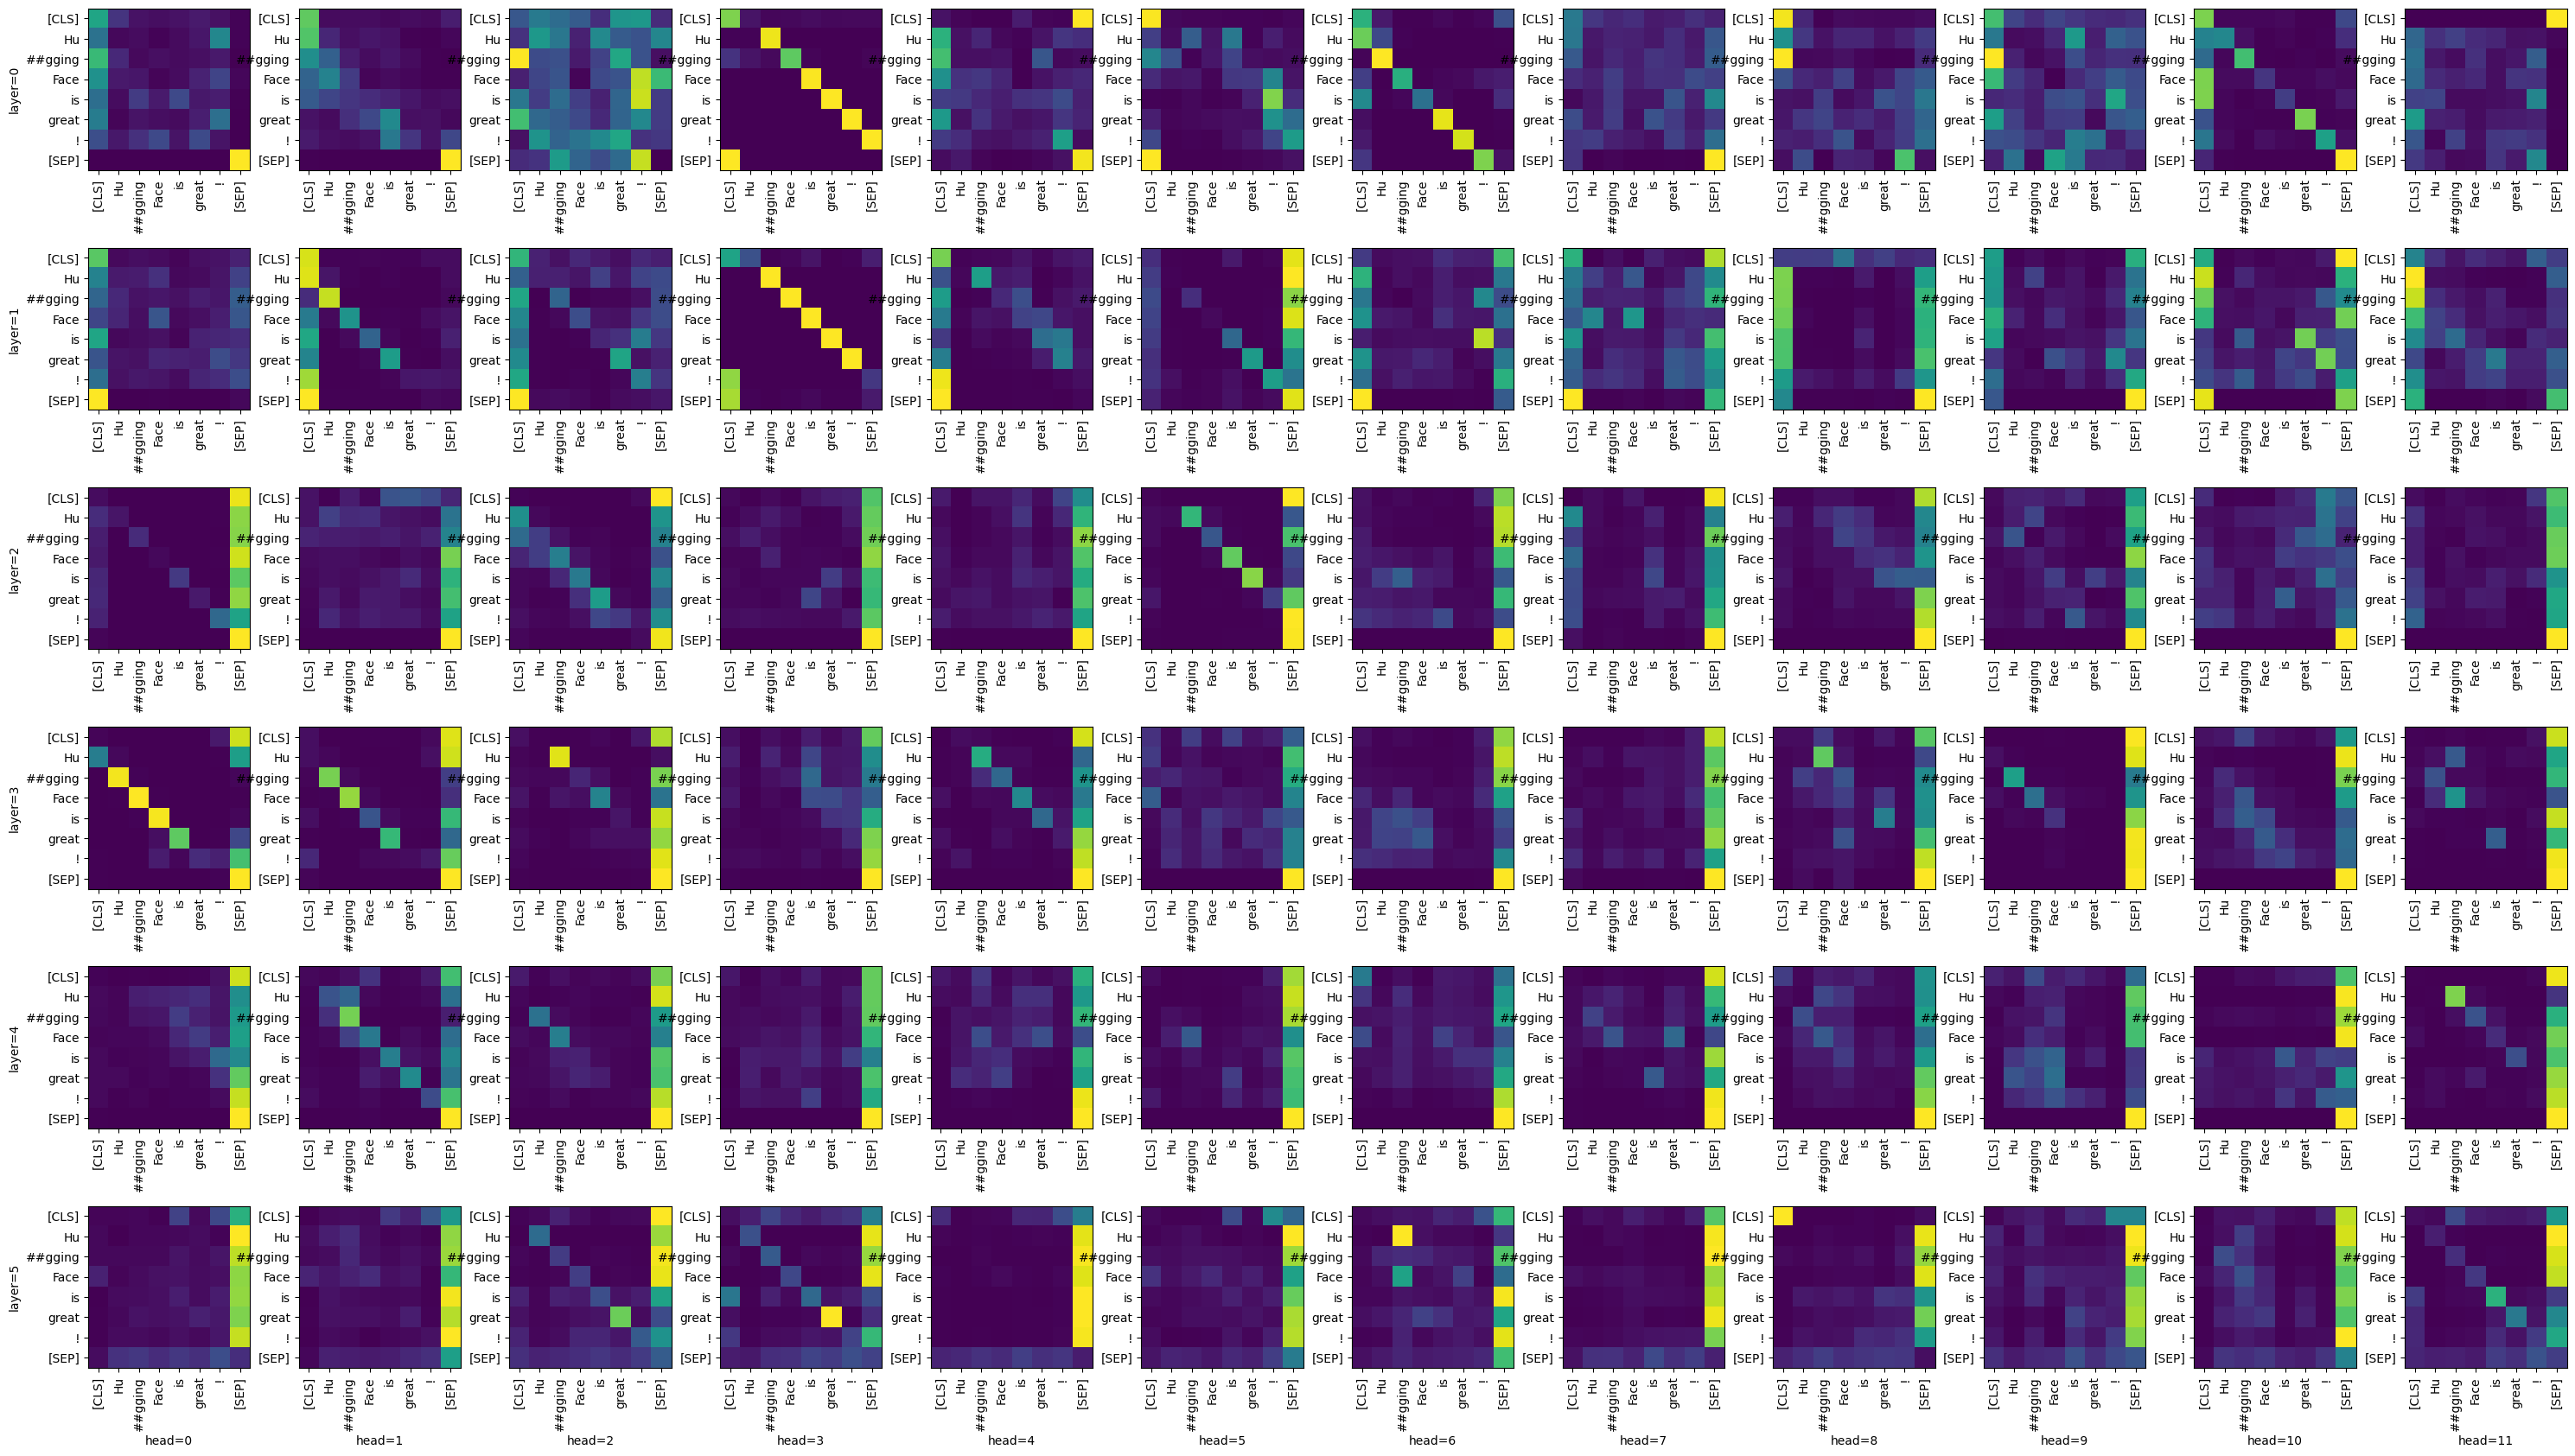

In [11]:
from matplotlib import pyplot as plt

tokens = tokenizer.convert_ids_to_tokens(model_inputs.input_ids[0])
print(tokens)

n_layers = len(model_output.attentions)
n_heads = len(model_output.attentions[0][0])
fig, axes = plt.subplots(6, 12)
fig.set_size_inches(18.5*2, 10.5*2)
for layer in range(n_layers):
    for i in range(n_heads):
        axes[layer, i].imshow(model_output.attentions[layer][0, i])
        axes[layer][i].set_xticks(list(range(8))) # 8 is the number of wordpieces in our example
        axes[layer][i].set_xticklabels(labels=tokens, rotation="vertical")
        axes[layer][i].set_yticks(list(range(8))) # 8 is the number of wordpieces in our example
        axes[layer][i].set_yticklabels(labels=tokens)

        if layer == 5:
            axes[layer, i].set(xlabel=f"head={i}")
        if i == 0:
            axes[layer, i].set(ylabel=f"layer={layer}")

plt.subplots_adjust(wspace=0.3)
plt.show()

## Fine-Tuning

For your final projects, you will need to finetune a pretrained language model.

In addition to models, Hugging Face also provides a large repository of datasets.

### **Loading the data**

For this example we are going to work with the `imdb` dataset, which is a Large Movie Review Dataset.

We will use the native PyTorch version to load the dataset.




In [12]:
from datasets import load_dataset, DatasetDict

imdb_dataset = load_dataset("imdb")


# Just take the first 50 tokens for speed on cpu
def truncate(example):
    return {
        'text': " ".join(example['text'].split()[:50]),
        'label': example['label']
    }

# Take 128 random examples for train and 32 validation
small_imdb_dataset = DatasetDict(
    train=imdb_dataset['train'].shuffle(seed=24).select(range(128)).map(truncate),
    val=imdb_dataset['train'].shuffle(seed=24).select(range(128, 160)).map(truncate),
)

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

In [13]:
small_imdb_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 128
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 32
    })
})

👋 ⚒ Print the first ten examples of the training dataset of the `small_imdb_dataset`.

In [19]:
# Your code here

{'text': ["I didn't know this was a silent movie with narration. I don't care for silent movies - the corny humor, flickering lighting and film, etc. I'm sure that attributes to the low score I assigned it. It was about chapter 8 before I found any interest in this story and", 'Well, first off, if you\'re checking out Revolt of the Zombies as some very early Night of the Living Dead (1968)-type film, forget it. This is about "zombies" in a more psychological sense, where that term merely denotes someone who is not in control of their will, but who must', 'John Thaw, of Inspector Morse fame, plays old Tom Oakley in this movie. Tom lives in a tiny English village during 1939 and the start of the Second World War. A bit of a recluse, Tom has not yet recovered from the death of his wife and son while he', 'I view probably 200 movies a year both at theaters and at home and I can say with confidence that this movie is by far the worst I have seen this year (If not ever, however I have not ac

### **Training** (Here = Fine-Tuning a Pre-Trained model)

Hugging Face models also use `torch.nn.Module` like you did in Tutorial 3, which means backpropagation happens the same way and the same optimizers can be used. Hugging Face includes optimizers and learning rate schedules, i.e., changes along the training process, to train Transformer models.

With Stochastic Gradient Descent the learning rate does not change during training. Adam represents an optimizer that extends SGD by providing an Adaptive Gradient Algorithm (AdaGrad) and an adaptation depending on the recent magnitude of gradients called Root Mean Square Propagation (RMSProp). For more details on different optimizers, see for instance [this information](https://www.ruder.io/optimizing-gradient-descent/#adam).


### Training Loop with Hugging Face Trainer

A [Hugging Face tutorial](https://huggingface.co/docs/transformers/training) on both variants of training is available. Here we will use this `Trainer` class that covers most needs.

Just to be sure tht we have the right settings, we load the dataset again and tokenize it.

In [21]:
from datasets import load_dataset, DatasetDict
from transformers import DataCollatorWithPadding

imdb_dataset = load_dataset("imdb")
# we had loaded the imdb dataset already above - if not, outcomment this line
# Make sure you have the right tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-cased")


# Just take the first 50 tokens for speed on CPU
def truncate(example):
    return {
        'text': " ".join(example['text'].split()[:100]),
        'label': example['label']
    }

# Take 128 random examples for train and 32 validation
small_imdb_dataset = DatasetDict(
    train=imdb_dataset['train'].shuffle(seed=24).select(range(128)).map(truncate),
    val=imdb_dataset['train'].shuffle(seed=24).select(range(128, 160)).map(truncate),
)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True)

small_tokenized_dataset = small_imdb_dataset.map(tokenize_function, batched=True, batch_size=16)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

We can specify all the training hyperparameters by using the `TrainningArguments`class, which is detailed [here](https://huggingface.co/docs/transformers/main_classes/trainer#transformers.TrainingArguments).

The `Trainer` then performs the training und you can pass all the arguments to this class, even model checkpoints to resume training later. What was the validation part in the loop above is now the `compute_metrics` function.

In [22]:
import numpy as np
import evaluate
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('distilbert/distilbert-base-cased', num_labels=2)
accuracy = evaluate.load("accuracy")

arguments = TrainingArguments(
    output_dir="sample_cl_trainer",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_steps=8,
    num_train_epochs=5,
    eval_strategy="epoch", # run validation at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to='none',
    seed=224
)

def compute_metrics(eval_pred):
    """Called at the end of validation. Gives accuracy"""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    # calculates the accuracy
    return accuracy.compute(predictions=predictions, references=labels)


trainer = Trainer(
    model=model,
    args=arguments,
    train_dataset=small_tokenized_dataset['train'],
    eval_dataset=small_tokenized_dataset['val'], # change to test when you do your final evaluation!
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.569900,0.578753,0.812500
2,0.431600,0.490745,0.843750
3,0.303700,0.439762,0.812500
4,0.226800,0.430114,0.781250
5,0.162200,0.418744,0.781250


TrainOutput(global_step=40, training_loss=0.33882194459438325, metrics={'train_runtime': 61.4792, 'train_samples_per_second': 10.41, 'train_steps_per_second': 0.651, 'total_flos': 31945341107136.0, 'train_loss': 0.33882194459438325, 'epoch': 5.0})

If we wish to double-check the final performance of the model on the validation dataset, we can use the following function straight on the trainer. Usually, this final test **should be done on the test set** and not on the validation set.

In [46]:
result = trainer.evaluate(small_tokenized_dataset['val'])
print(result)

#OR
result_predict = trainer.predict(small_tokenized_dataset['val'])
print(result_predict.metrics)

{'eval_loss': 0.4187440872192383, 'eval_accuracy': 0.78125, 'eval_runtime': 1.2345, 'eval_samples_per_second': 25.921, 'eval_steps_per_second': 1.62, 'epoch': 5.0}
{'test_loss': 0.4187440872192383, 'test_accuracy': 0.78125, 'test_runtime': 1.1617, 'test_samples_per_second': 27.545, 'test_steps_per_second': 1.722}


Then, we want to load the fine-tuned model for evaluation. We can load our models just like we load models from Hugging Face only that we need to pass the path to our models to the function `from_pretrained()`. We had 24 training steps (3 epochs times 8, where the 8 is the total number of training data (128) divided by the batch size (16)) so we can load a checkpoint for each of these steps.  

In [25]:
test_str = "I love this movie!"

fine_tuned_model = AutoModelForSequenceClassification.from_pretrained("sample_cl_trainer/checkpoint-40")
model_inputs = tokenizer(test_str, return_tensors="pt")
prediction = torch.argmax(fine_tuned_model(**model_inputs).logits)
print(["NEGATIVE", "POSITIVE"][prediction])

NEGATIVE


In [42]:
from datasets import load_dataset
from evaluate import evaluator
from transformers import AutoModelForSequenceClassification, pipeline

data = load_dataset("imdb", split="test").shuffle(seed=42).select(range(1000))
task_evaluator = evaluator("text-classification")

# 1. Pass a model name or path
eval_results = task_evaluator.compute(
    tokenizer=tokenizer,
    model_or_pipeline=fine_tuned_model,
    data=data
    #label_mapping={"NEGATIVE": 0, "POSITIVE": 1}
)

Device set to use cuda:0


ValueError: invalid literal for int() with base 10: 'LABEL_1'

## **Fine-Tuning in PyTorch**

When we wish to fine-tune using PyTorch, we first need to prepare the data accordingly.

### Loading the data for use in PyTorch

We need to prepare the dataset as input to the model by tokenization and padding. We also need to:

1. Remove the `text` column because the model does not accept raw text as an input:

    ```py
    >>> tokenized_datasets = tokenized_datasets.remove_columns(["text"])
    ```

2. Rename the `label` column to `labels` because the model expects the argument to be named `labels`:

    ```py
    >>> tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
    ```

3. Set the format of the dataset to return PyTorch tensors instead of lists:

    ```py
    >>> tokenized_datasets.set_format("torch")
    ```

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True)

small_tokenized_dataset = small_imdb_dataset.map(tokenize_function, batched=True, batch_size=16)
small_tokenized_dataset = small_tokenized_dataset.remove_columns(["text"])
small_tokenized_dataset = small_tokenized_dataset.rename_column("label", "labels")
small_tokenized_dataset.set_format("torch")

We can now check what the first two sequences of the tokenized training dataset looks like.

In [ ]:
small_tokenized_dataset['train'][0:2]

We then create a `DataLoader` for your training and test datasets so we can iterate over batches of data:

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(small_tokenized_dataset['train'], batch_size=16)
eval_dataloader = DataLoader(small_tokenized_dataset['val'], batch_size=16)

### Training Loop in PyTorch

First, we will use native PyTorch for the training loop and training, since it is more transparent than the built-in Hugging Face functions.

In this example we are going to use AdamW Optimizer, an extension of Adam with weight decay. And we're using a linear learning rate scheduler, which reduces the learning rate a little bit after each training step over the course of training.

Let's load our model, optimizer, and learning rate scheduler. For this we need to the basic hyperparameters of the number of epochs we wish to train for and the number of training steps that depends on the size of the training dataset. We again get the same warning as before about this model not having been trained on sequence classification.

To keep track of your training progress, use the [tqdm](https://tqdm.github.io/) library to add a progress bar over the number of training steps.

We we also include a validation step that test the current state of the model on the validation dataset and saves a version of the model called `checkpoint`. To save the different model states as checkpoints, we first create a folder called checkpoints.  

You might also want to consider early stopping, that is, interrupting the training loop when a certain threshold (value) has been reached. More information on that can be found [here](https://huggingface.co/docs/transformers/main_classes/callback#transformers.TrainerCallback).

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW
from tqdm.notebook import tqdm

model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-cased", num_labels=5)

num_epochs = 3
num_training_steps = 3 * len(train_dataloader)
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)
lr_scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

Last you can specify to use a `GPU`if you have access to one, e.g. on Colab, or else use a `CPU` if there is no access. Today, we will only train with `CPU`so no need to run the following cell.

In [ ]:
import torch

#device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
#model.to(device)

In [ ]:
!mkdir checkpoints

In [ ]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))
best_val_loss = float("inf")

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        #batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

    # validation
    model.eval()
    for batch_i, batch in enumerate(eval_dataloader):
        with torch.no_grad():
            output = model(**batch)
        loss += output.loss

    avg_val_loss = loss / len(eval_dataloader)
    print(f"Validation loss: {avg_val_loss}")
    if avg_val_loss < best_val_loss:
        print("Saving checkpoint!")
        best_val_loss = avg_val_loss
        model.save_pretrained(f"checkpoints/epoch_{epoch}.pt")